* [x] Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

* [x] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

* [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

* [x] Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

* [x] Замерить время обучения каждой модели для каждой стратегии.

* [ ] Для оценки качества моделей используйте метрику AUC-ROC.

* [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

* [x] (+3 балла) Повторить все пункты для задачи Multilabel classification (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать MultiOutputClassifier и ClassifierChain.

* [x] (+2 балла) Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2.

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [32]:
df = pd.read_csv('Customer_Segmentation.csv')

In [33]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [34]:
df.drop(['ID'], axis = 1, inplace=True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [35]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [36]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

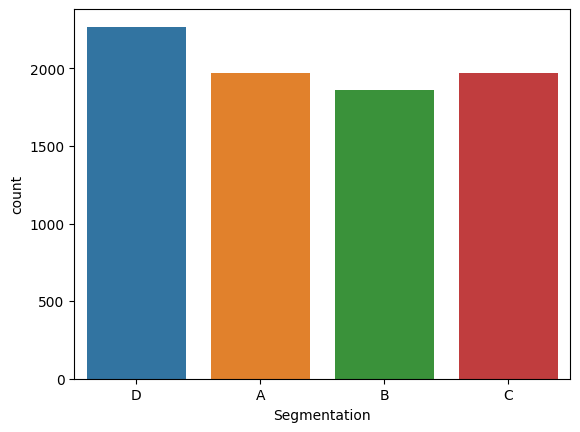

In [37]:
sns.countplot(data=df, x='Segmentation'); 

In [38]:
df.groupby(['Gender', 'Segmentation'])['Segmentation'].count() 

Gender  Segmentation
Female  A                909
        B                861
        C                922
        D                959
Male    A               1063
        B                997
        C               1048
        D               1309
Name: Segmentation, dtype: int64

In [39]:
df['Gender'].\
replace(['Male', 'Female'],\
        [1,0], inplace=True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,0,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,0,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,1,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,0,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


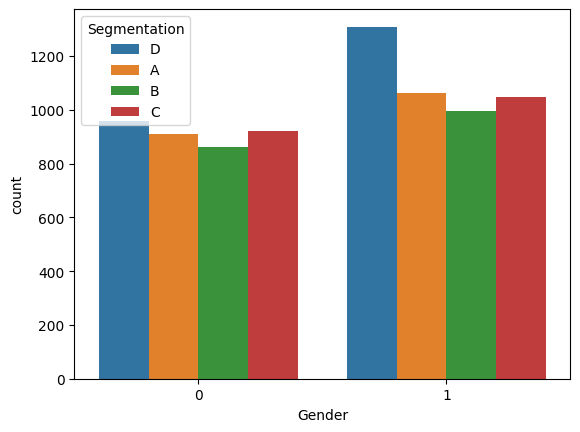

In [40]:
sns.countplot(x='Gender', hue = 'Segmentation', data = df); 

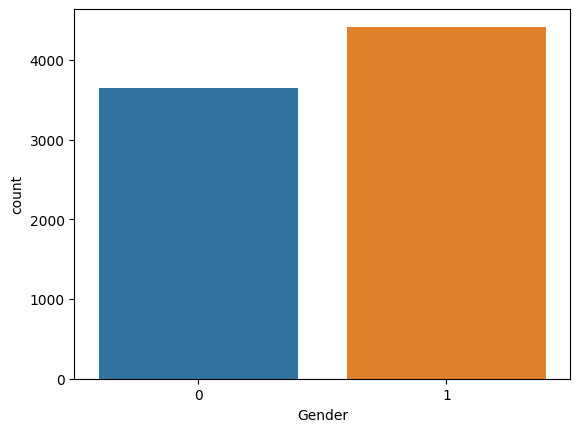

In [41]:
sns.countplot(data=df, x='Gender'); 

In [42]:
pd.crosstab(df['Profession'], df['Segmentation'], margins=True).style.background_gradient()

Segmentation,A,B,C,D,All
Profession,,,,,
Artist,558,756,1065,137,2516
Doctor,199,143,140,206,688
Engineer,259,189,75,176,699
Entertainment,365,221,148,215,949
Executive,125,183,175,116,599
Healthcare,106,101,146,979,1332
Homemaker,73,55,28,90,246
Lawyer,197,158,140,128,623
Marketing,57,30,35,170,292


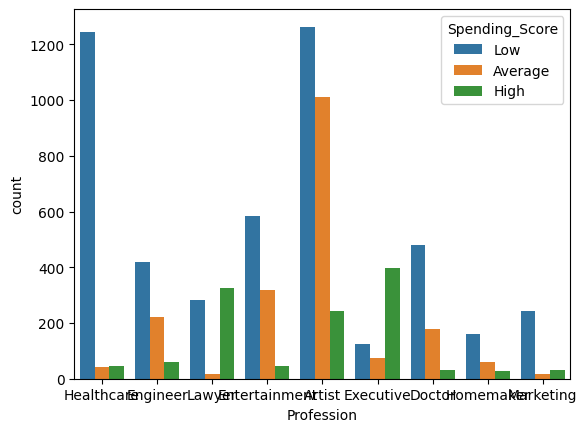

In [43]:
sns.countplot(x='Profession', hue = 'Spending_Score', data = df); 

In [44]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

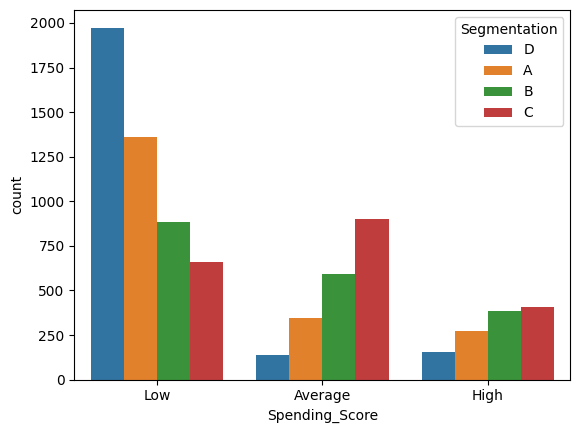

In [45]:
sns.countplot(x='Spending_Score', hue = 'Segmentation', data = df); 

In [46]:
df['Segmentation'].replace(['A', 'B', 'C', 'D'], [0,1,2,3], inplace=True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3
1,0,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,0
2,0,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
3,1,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
4,0,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,0


In [47]:
df.fillna(method='pad', inplace=True)
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [48]:
df = pd.get_dummies(data=df, columns=['Profession'], prefix='prof')
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,prof_Artist,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing
0,1,No,22,No,1.0,Low,4.0,Cat_4,3,0,0,0,0,0,1,0,0,0
1,0,Yes,38,Yes,1.0,Average,3.0,Cat_4,0,0,0,1,0,0,0,0,0,0
2,0,Yes,67,Yes,1.0,Low,1.0,Cat_6,1,0,0,1,0,0,0,0,0,0
3,1,Yes,67,Yes,0.0,High,2.0,Cat_6,1,0,0,0,0,0,0,0,1,0
4,0,Yes,40,Yes,0.0,High,6.0,Cat_6,0,0,0,0,1,0,0,0,0,0


In [49]:
df['Ever_Married'].replace(['No', 'Yes'], [0,1], inplace=True)
df['Graduated'].replace(['No', 'Yes'], [0,1], inplace=True)
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,prof_Artist,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing
0,1,0,22,0,1.0,Low,4.0,Cat_4,3,0,0,0,0,0,1,0,0,0
1,0,1,38,1,1.0,Average,3.0,Cat_4,0,0,0,1,0,0,0,0,0,0
2,0,1,67,1,1.0,Low,1.0,Cat_6,1,0,0,1,0,0,0,0,0,0
3,1,1,67,1,0.0,High,2.0,Cat_6,1,0,0,0,0,0,0,0,1,0
4,0,1,40,1,0.0,High,6.0,Cat_6,0,0,0,0,1,0,0,0,0,0


In [50]:
df = pd.get_dummies(data=df, columns=['Spending_Score'], prefix='sp_score')
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Var_1,Segmentation,prof_Artist,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing,sp_score_Average,sp_score_High,sp_score_Low
0,1,0,22,0,1.0,4.0,Cat_4,3,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,38,1,1.0,3.0,Cat_4,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,67,1,1.0,1.0,Cat_6,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,67,1,0.0,2.0,Cat_6,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,40,1,0.0,6.0,Cat_6,0,0,0,0,1,0,0,0,0,0,0,1,0


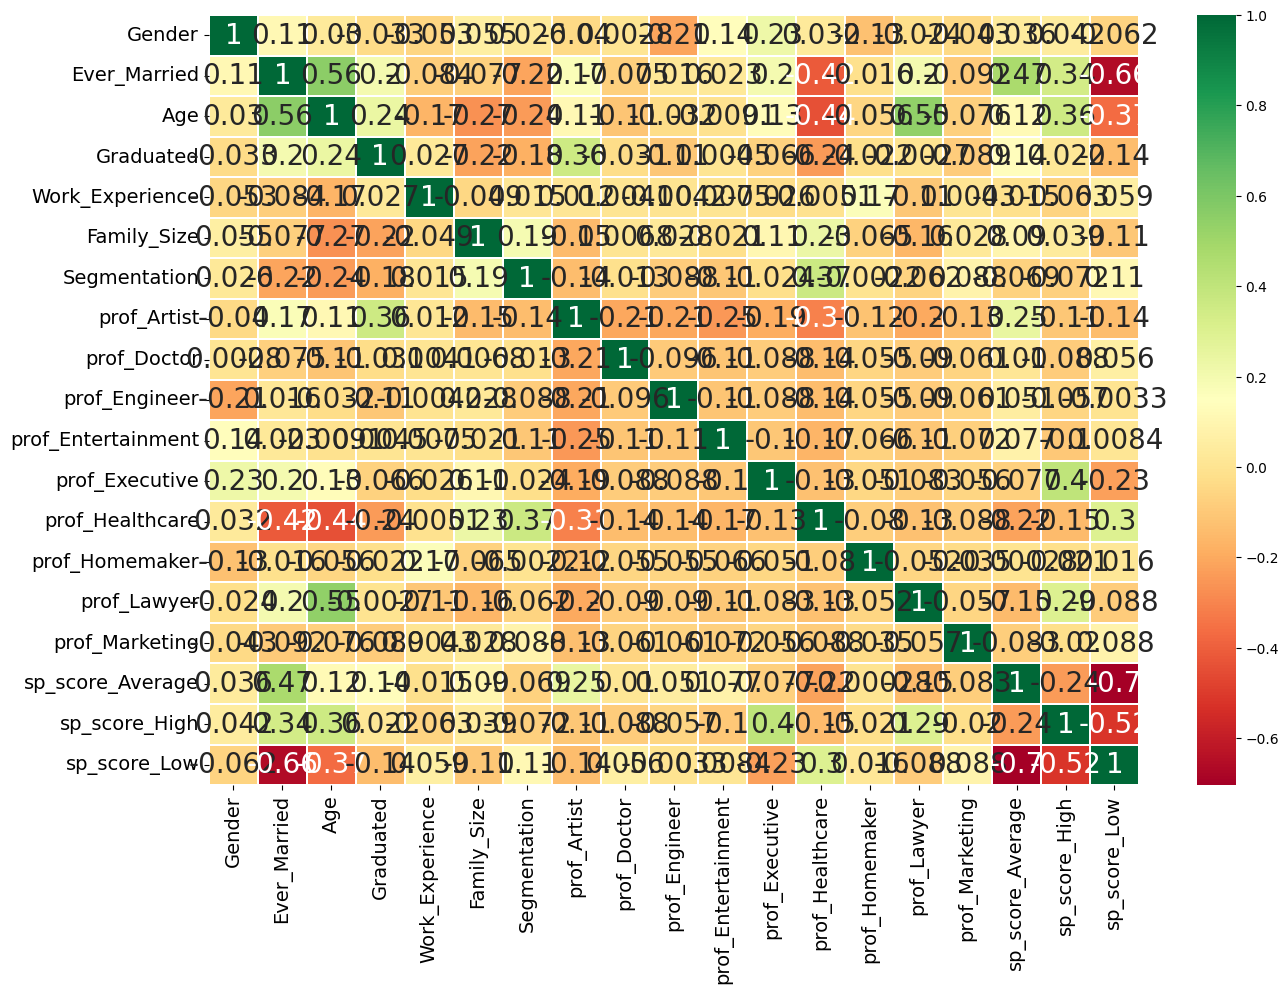

In [51]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [60]:
df.drop(['Var_1'],axis=1, inplace=True)

Модели

In [61]:
model_accuracies = {}  # сюда будем сохранять качество натренированных моделей

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# cols =
X =  df.loc[:, df.columns != 'Segmentation']
y = df['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y.astype('float64'), test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

# OneVsRest

In [85]:
from sklearn.multiclass import OneVsRestClassifier

In [120]:
model_accuracies = {}
model_tr_time = {}

In [144]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

ovr_lr = OneVsRestClassifier(LogisticRegression())

start = time.time()
ovr_lr.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovr_LogisticRegression'] = tr_time

acc = roc_auc_score(y_test, ovr_lr.predict_proba(X_test_scaled), multi_class='ovr')
print("train auc-roc score:",roc_auc_score(y_train, ovr_lr.predict_proba(X_train_scaled), multi_class='ovr'))
print("test auc-roc score:", acc)
model_accuracies['ovr_LogisticRegression'] = acc

Training time: 0.031018733978271484s
train auc-roc score: 0.7574566018319058
test auc-roc score: 0.7550265563582338


In [125]:
from sklearn.neighbors import KNeighborsClassifier
ovr_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))

start = time.time()
ovr_knn.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovr_KNeighborsClassifier'] = tr_time

acc = roc_auc_score(y_test, ovr_knn.predict_proba(X_test_scaled), multi_class='ovr')
print("train auc-roc score:",roc_auc_score(y_train, ovr_knn.predict_proba(X_train_scaled), multi_class='ovr'))
print("test auc-roc score:", acc)
model_accuracies['ovr_KNeighborsClassifier'] = acc

Training time: 0.006531476974487305s
train auc-roc score: 0.9118087043368407
test auc-roc score: 0.6893749049624394


In [137]:
from sklearn.naive_bayes import GaussianNB
ovr_nb = OneVsRestClassifier(GaussianNB())

start = time.time()
ovr_nb.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovr_GaussianNB'] = tr_time

acc = roc_auc_score(y_test, ovr_nb.predict_proba(X_test_scaled), multi_class='ovr')
print("train auc-roc score:",roc_auc_score(y_train, ovr_nb.predict_proba(X_train_scaled), multi_class='ovr'))
print("test auc-roc score:", acc)
model_accuracies['ovr_GaussianNB'] = acc

Training time: 0.0112152099609375s
train auc-roc score: 0.7280890027276771
test auc-roc score: 0.7324302750332268


In [135]:
from sklearn.tree import DecisionTreeClassifier
ovr_dtc = OneVsRestClassifier(DecisionTreeClassifier())

start = time.time()
ovr_dtc.fit(X_train, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovr_DecisionTreeClassifier'] = tr_time

acc = ovr_dtc.score(X_test, y_test)
print("train accuracy:", ovr_dtc.score(X_train, y_train))
print("test accuracy:", acc)
model_accuracies['ovr_DecisionTreeClassifier'] = acc

Training time: 0.05001211166381836s
train accuracy: 0.9429785726934655
test accuracy: 0.4365964477488641


In [140]:
from sklearn.svm import SVC
ovr_svc = OneVsRestClassifier(SVC(random_state=0))

start = time.time()
ovr_svc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovr_SVC'] = tr_time

acc = ovr_dtc.score(X_test_scaled, y_test)
print("train accuracy:", ovr_dtc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['ovr_SVC'] = acc

Training time: 3.1494338512420654s
train accuracy: 0.3839206658402692
test accuracy: 0.385790995456423


# OneVsOne 

In [92]:
from sklearn.multiclass import OneVsOneClassifier

In [152]:
ovo_lr = OneVsOneClassifier(LogisticRegression())

start = time.time()
ovo_lr.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovo_LogisticRegression'] = tr_time

acc = ovo_lr.score(X_test_scaled, y_test)
print("train accuracy:", ovo_lr.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['ovo_LogisticRegression'] = acc

Training time: 0.07215332984924316s
train accuracy: 0.5162032937843103
test accuracy: 0.5059892606361008


In [153]:
ovo_knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=3))

start = time.time()
ovo_knn.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovo_KNeighborsClassifier'] = tr_time

acc = ovo_knn.score(X_test_scaled, y_test)
print("train accuracy:", ovo_knn.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['ovo_KNeighborsClassifier'] = acc

Training time: 0.015028953552246094s
train accuracy: 0.6807154241190012
test accuracy: 0.47872779843040064


In [154]:
ovo_nb = OneVsOneClassifier(GaussianNB())

start = time.time()
ovo_nb.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovo_GaussianNB'] = tr_time

acc = ovo_nb.score(X_test_scaled, y_test)
print("train accuracy:", ovo_nb.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['ovo_GaussianNB'] = acc

Training time: 0.029006242752075195s
train accuracy: 0.4903488578006021
test accuracy: 0.48698884758364314


In [155]:
ovo_dtc = OneVsOneClassifier(DecisionTreeClassifier())

start = time.time()
ovo_dtc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovo_DecisionTreeClassifier'] = tr_time

acc = ovo_dtc.score(X_test_scaled, y_test)
print("train accuracy:", ovo_dtc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['ovo_DecisionTreeClassifier'] = acc

Training time: 0.11002564430236816s
train accuracy: 0.9429785726934655
test accuracy: 0.44774886410574144


In [156]:
ovo_svc = OneVsOneClassifier(SVC(random_state=0))

start = time.time()
ovo_svc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['ovo_SVC'] = tr_time

acc = ovo_svc.score(X_test_scaled, y_test)
print("train accuracy:", ovo_svc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['ovo_SVC'] = acc

Training time: 2.821216344833374s
train accuracy: 0.5567557995395785
test accuracy: 0.5080545229244114


# OutputCode 

In [99]:
from sklearn.multiclass import OutputCodeClassifier

In [158]:
occ_lr = OutputCodeClassifier(LogisticRegression())

start = time.time()
occ_lr.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['occ_LogisticRegression'] = tr_time

acc = occ_lr.score(X_test_scaled, y_test)
print("train accuracy:", occ_lr.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['occ_LogisticRegression'] = acc

Training time: 0.11154985427856445s
train accuracy: 0.43350451567203824
test accuracy: 0.4159438248657579


In [159]:
occ_knn = OutputCodeClassifier(KNeighborsClassifier(n_neighbors=3))

start = time.time()
occ_knn.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['occ_KNeighborsClassifier'] = tr_time

acc = occ_knn.score(X_test_scaled, y_test)
print("train accuracy:", occ_knn.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['occ_KNeighborsClassifier'] = acc

Training time: 0.0980224609375s
train accuracy: 0.6766424650256774
test accuracy: 0.4440313919867823


In [160]:
occ_nb = OutputCodeClassifier(GaussianNB())

start = time.time()
occ_nb.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['occ_GaussianNB'] = tr_time

acc = occ_nb.score(X_test_scaled, y_test)
print("train accuracy:", occ_nb.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['occ_GaussianNB'] = acc

Training time: 0.02200460433959961s
train accuracy: 0.46892155126615903
test accuracy: 0.466336224700537


In [161]:
occ_dtc = OutputCodeClassifier(DecisionTreeClassifier())

start = time.time()
occ_dtc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['occ_DecisionTreeClassifier'] = tr_time

acc = occ_dtc.score(X_test_scaled, y_test)
print("train accuracy:", occ_dtc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['occ_DecisionTreeClassifier'] = acc

Training time: 0.0890202522277832s
train accuracy: 0.9307596954134939
test accuracy: 0.42998760842627015


In [162]:
occ_svc = OutputCodeClassifier(SVC(random_state=0))

start = time.time()
occ_svc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['occ_SVC'] = tr_time

acc = occ_svc.score(X_test_scaled, y_test)
print("train accuracy:", occ_svc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['occ_SVC'] = acc

Training time: 5.049597501754761s
train accuracy: 0.5117761643350451
test accuracy: 0.49153242461792646


In [163]:
model_tr_time

{'ovr_LogisticRegression': 0.0310,
 'ovr_KNeighborsClassifier': 0.0065,
 'ovr_GaussianNB': 0.0112,
 'ovr_DecisionTreeClassifier': 0.0500,
 'ovr_SVC': 3.1494,
 'ovo_LogisticRegression': 0.0722,
 'ovo_KNeighborsClassifier': 0.0150,
 'ovo_GaussianNB': 0.0290,
 'ovo_DecisionTreeClassifier': 0.1100,
 'ovo_SVC': 2.8212,
 'occ_LogisticRegression': 0.1115,
 'occ_KNeighborsClassifier': 0.0980,
 'occ_GaussianNB': 0.0220,
 'occ_DecisionTreeClassifier': 0.0890,
 'occ_SVC': 5.0496}

In [164]:
model_accuracies

{'ovr_LogisticRegression': 0.7550,
 'ovr_KNeighborsClassifier': 0.6894,
 'ovr_GaussianNB': 0.7324,
 'ovr_DecisionTreeClassifier': 0.3858,
 'ovr_SVC': 0.3858,
 'ovo_LogisticRegression': 0.5060,
 'ovo_KNeighborsClassifier': 0.4787,
 'ovo_GaussianNB': 0.4870,
 'ovo_DecisionTreeClassifier': 0.4477,
 'ovo_SVC': 0.5081,
 'occ_LogisticRegression': 0.4159,
 'occ_KNeighborsClassifier': 0.4440,
 'occ_GaussianNB': 0.4663,
 'occ_DecisionTreeClassifier': 0.4300,
 'occ_SVC': 0.4915}

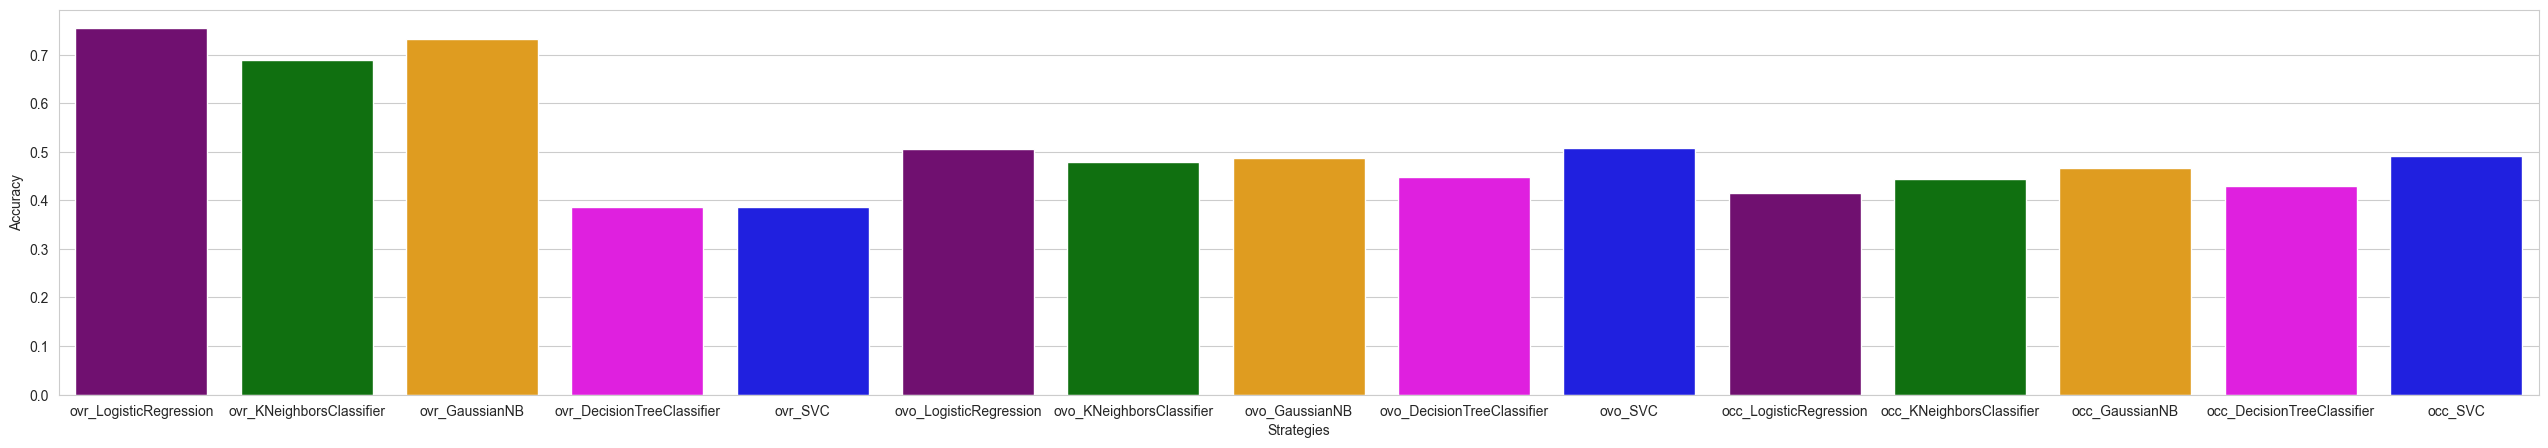

In [168]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(32, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Strategies")
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette=colors)
plt.show()

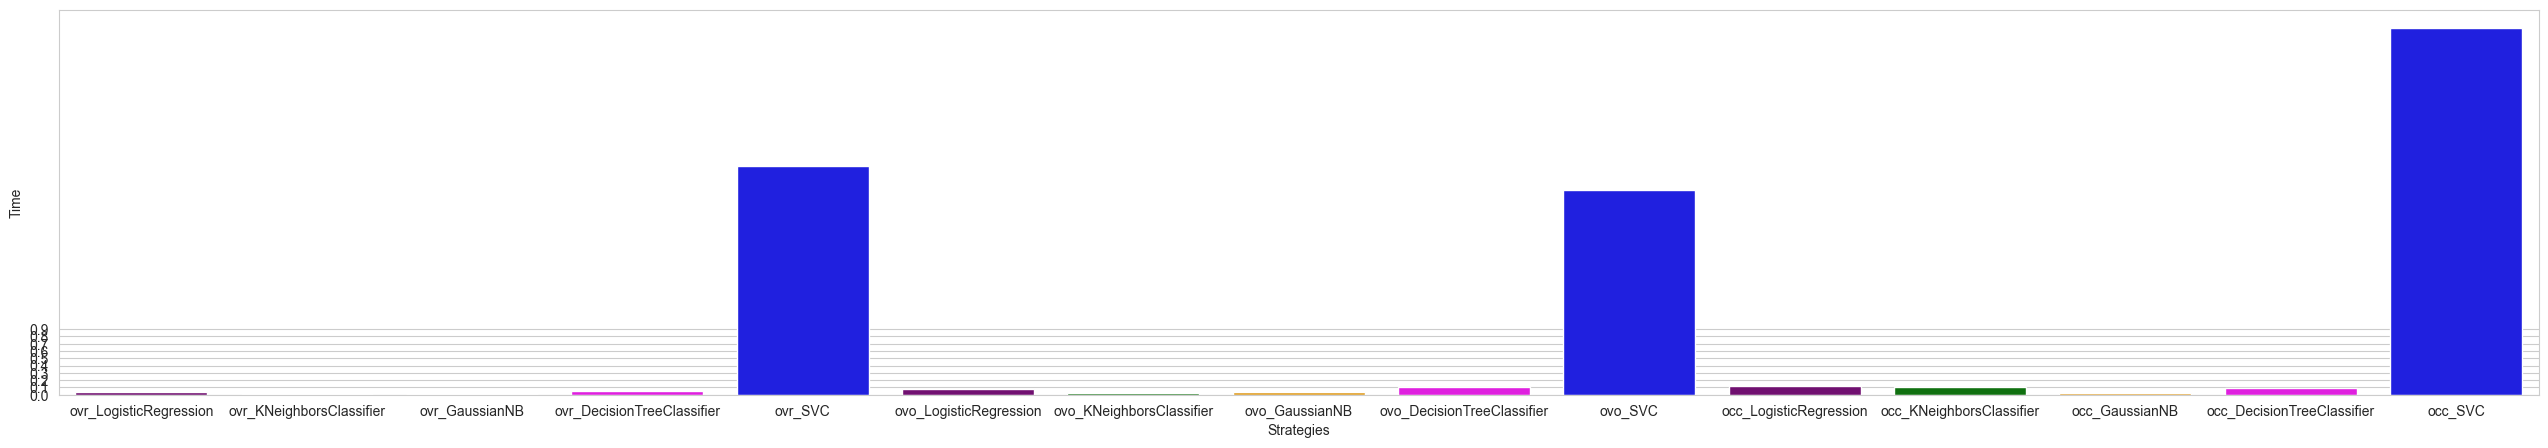

In [171]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(32, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylabel("Time")
plt.xlabel("Strategies")
sns.barplot(x=list(model_tr_time.keys()), y=list(model_tr_time.values()), palette=colors)
plt.show()

In [198]:
model_accuracies = {}
model_tr_time = {}

In [176]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,prof_Artist,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing,sp_score_Average,sp_score_High,sp_score_Low
0,1,0,22,0,1.0,4.0,3,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,38,1,1.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,67,1,1.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,67,1,0.0,2.0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,40,1,0.0,6.0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [177]:
df = pd.get_dummies(data=df, columns=['Segmentation'], prefix='segment')

In [178]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,prof_Artist,prof_Doctor,prof_Engineer,prof_Entertainment,...,prof_Homemaker,prof_Lawyer,prof_Marketing,sp_score_Average,sp_score_High,sp_score_Low,segment_0,segment_1,segment_2,segment_3
0,1,0,22,0,1.0,4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,38,1,1.0,3.0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,67,1,1.0,1.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,1,1,67,1,0.0,2.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,40,1,0.0,6.0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [194]:
df.loc[:, (df.columns != 'segment_0') & (df.columns != 'segment_1') & (df.columns != 'segment_2') & (df.columns != 'segment_3')]

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,prof_Artist,prof_Doctor,prof_Engineer,prof_Entertainment,prof_Executive,prof_Healthcare,prof_Homemaker,prof_Lawyer,prof_Marketing,sp_score_Average,sp_score_High,sp_score_Low
0,1,0,22,0,1.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,38,1,1.0,3.0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,67,1,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,67,1,0.0,2.0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,40,1,0.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0.0,7.0,1,0,0,0,0,0,0,0,0,0,0,1
8064,1,0,35,0,3.0,4.0,0,0,0,0,1,0,0,0,0,0,0,1
8065,0,0,33,1,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0,1
8066,0,0,27,1,1.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1


In [195]:
X =  df.loc[:, (df.columns != 'segment_0') & (df.columns != 'segment_1') & (df.columns != 'segment_2') & (df.columns != 'segment_3')]
y = df[['segment_0', 'segment_1', 'segment_2', 'segment_3']]

X_train, X_test, y_train, y_test = train_test_split(X, y.astype('float64'), test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

# MultiOutputClassifier

In [173]:
from sklearn.multioutput import MultiOutputClassifier

In [199]:
moc_lr = MultiOutputClassifier(LogisticRegression())

start = time.time()
moc_lr.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['moc_LogisticRegression'] = tr_time

acc = moc_lr.score(X_test_scaled, y_test)
print("train accuracy:", moc_lr.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['moc_LogisticRegression'] = acc

Training time: 0.03800797462463379s
train accuracy: 0.2746591110324066
test accuracy: 0.26931020239570425


In [200]:
moc_knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3))

start = time.time()
moc_knn.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['moc_KNeighborsClassifier'] = tr_time

acc = moc_knn.score(X_test_scaled, y_test)
print("train accuracy:", moc_knn.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['moc_KNeighborsClassifier'] = acc

Training time: 0.004001140594482422s
train accuracy: 0.6141313972020542
test accuracy: 0.40272614622057


In [201]:
moc_nb = MultiOutputClassifier(GaussianNB())

start = time.time()
moc_nb.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['moc_GaussianNB'] = tr_time

acc = moc_nb.score(X_test_scaled, y_test)
print("train accuracy:", moc_nb.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['moc_GaussianNB'] = acc

Training time: 0.00900125503540039s
train accuracy: 0.20205418806445902
test accuracy: 0.19413465510119784


In [202]:
moc_dtc = MultiOutputClassifier(DecisionTreeClassifier())

start = time.time()
moc_dtc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['moc_DecisionTreeClassifier'] = tr_time

acc = moc_dtc.score(X_test_scaled, y_test)
print("train accuracy:", moc_dtc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['moc_DecisionTreeClassifier'] = acc

Training time: 0.05701303482055664s
train accuracy: 0.8997697892686383
test accuracy: 0.3333333333333333


In [203]:
moc_svc = MultiOutputClassifier(SVC(random_state=0))

start = time.time()
moc_svc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['moc_SVC'] = tr_time

acc = moc_svc.score(X_test_scaled, y_test)
print("train accuracy:", moc_svc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['moc_SVC'] = acc

Training time: 3.184652805328369s
train accuracy: 0.31308659465202765
test accuracy: 0.28913672036348614


# ClassifierChain

In [ ]:
from sklearn.multioutput import ClassifierChain

In [204]:
cc_lr = ClassifierChain(LogisticRegression())

start = time.time()
cc_lr.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['cc_LogisticRegression'] = tr_time

acc = cc_lr.score(X_test_scaled, y_test)
print("train accuracy:", cc_lr.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['cc_LogisticRegression'] = acc

Training time: 0.03600716590881348s
train accuracy: 0.45121303346909863
test accuracy: 0.4555968608013218


In [205]:
cc_knn = ClassifierChain(KNeighborsClassifier(n_neighbors=3))

start = time.time()
cc_knn.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['cc_KNeighborsClassifier'] = tr_time

acc = cc_knn.score(X_test_scaled, y_test)
print("train accuracy:", cc_knn.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['cc_KNeighborsClassifier'] = acc

Training time: 0.005001068115234375s
train accuracy: 0.6725695059323534
test accuracy: 0.47377116893845517


In [206]:
cc_nb = ClassifierChain(GaussianNB())

start = time.time()
cc_nb.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['cc_GaussianNB'] = tr_time

acc = cc_nb.score(X_test_scaled, y_test)
print("train accuracy:", cc_nb.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['cc_GaussianNB'] = acc

Training time: 0.010024547576904297s
train accuracy: 0.275367451744289
test accuracy: 0.2722015695993391


In [207]:
cc_dtc = ClassifierChain(DecisionTreeClassifier())

start = time.time()
cc_dtc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['cc_DecisionTreeClassifier'] = tr_time

acc = cc_dtc.score(X_test_scaled, y_test)
print("train accuracy:", cc_dtc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['cc_DecisionTreeClassifier'] = acc

Training time: 0.06901860237121582s
train accuracy: 0.9420931468036126
test accuracy: 0.44279223461379597


In [208]:
cc_svc = ClassifierChain(SVC(random_state=0))

start = time.time()
cc_svc.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['cc_SVC'] = tr_time

acc = cc_svc.score(X_test_scaled, y_test)
print("train accuracy:", cc_svc.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['cc_SVC'] = acc

Training time: 2.2777135372161865s
train accuracy: 0.5119532495130158
test accuracy: 0.4923585295332507


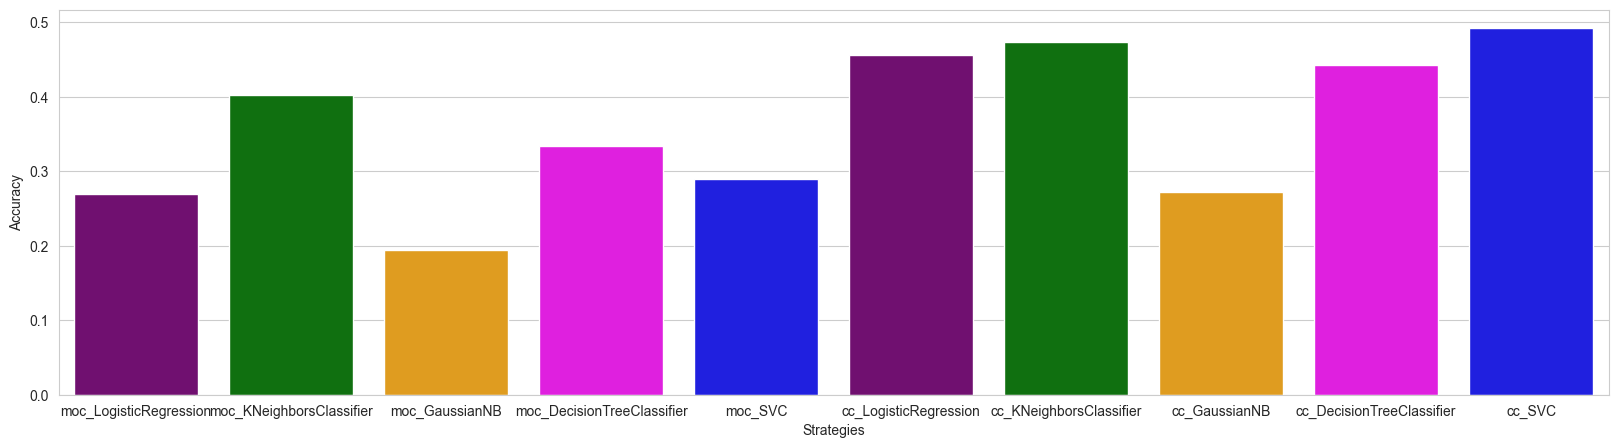

In [211]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(20, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Strategies")
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette=colors)
plt.show()

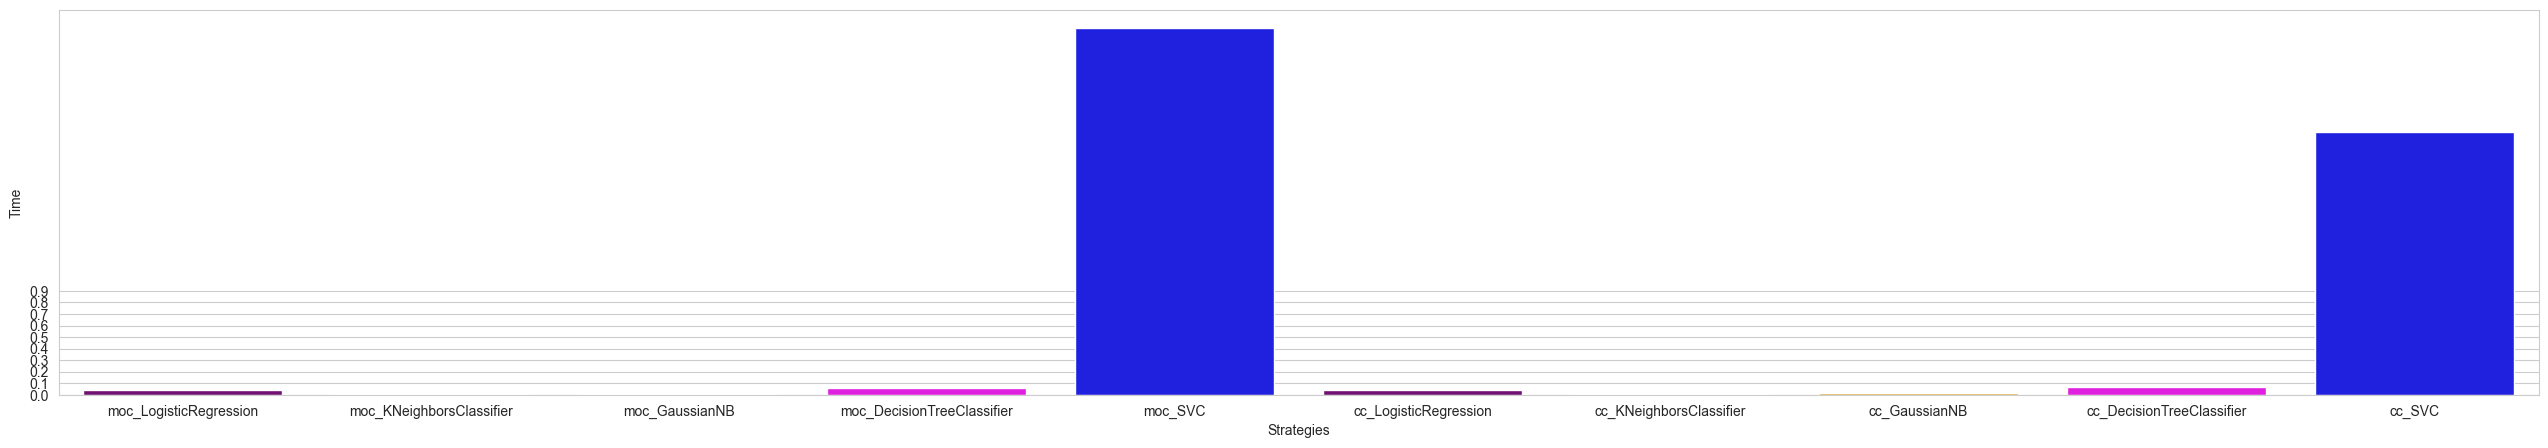

In [212]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(32, 5))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylabel("Time")
plt.xlabel("Strategies")
sns.barplot(x=list(model_tr_time.keys()), y=list(model_tr_time.values()), palette=colors)
plt.show()

In [214]:
model_accuracies = {}
model_tr_time = {}

In [213]:
from sklearn.multioutput import MultiOutputRegressor

In [215]:
from sklearn.linear_model import Ridge

mor_r = MultiOutputRegressor(Ridge())

start = time.time()
mor_r.fit(X_train_scaled, y_train)
stop = time.time()

tr_time = stop - start
print(f"Training time: {tr_time}s")
model_tr_time['mor_Ridge'] = tr_time

acc = mor_r.score(X_test_scaled, y_test)
print("train accuracy:", mor_r.score(X_train_scaled, y_train))
print("test accuracy:", acc)
model_accuracies['mor_Ridge'] = acc

Training time: 0.04100751876831055s
train accuracy: 0.16949547830302286
test accuracy: 0.16647258076297694
